<a href="https://colab.research.google.com/github/YayunEldina/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Google Drive

In [2]:
from google.colab import drive

# Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import library

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

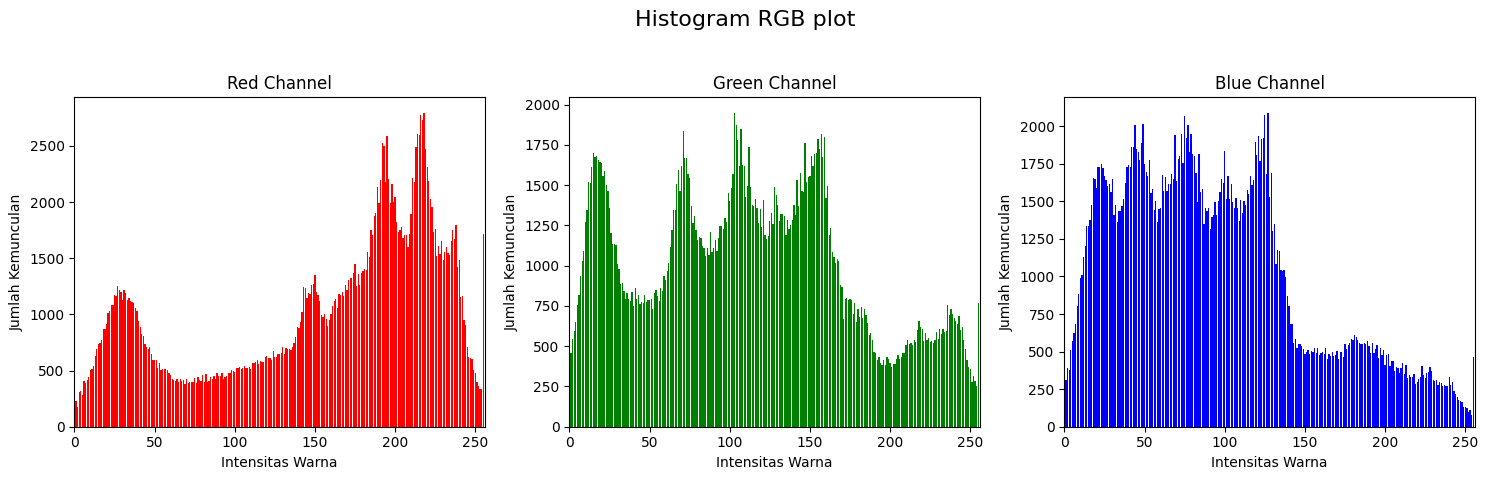

In [7]:
# Load and convert the image from BGR to RGB
image_rgb = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/lena.jpg'), cv2.COLOR_BGR2RGB)

# Create a figure with three subplots
plt.figure(figsize=(15, 5))

# Colors and titles for the channels
colors = ('r', 'g', 'b')
channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel']

# Loop through each color channel (R, G, B) and plot histogram
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    plt.bar(np.arange(256), cv2.calcHist([image_rgb], [i], None, [256], [0, 256]).flatten(), color=color)
    plt.xlim([0, 256])
    plt.title(channel_titles[i])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

# Set overall title and show plots
plt.suptitle('Histogram RGB plot', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?
- Jawab: hasil histogram dari kedua metode (OpenCV dan NumPy) adalah sama karena keduanya menghitung frekuensi kemunculan intensitas warna dari gambar yang sama dengan metode serupa. Perbedaannya hanya terletak pada visualisasi, di mana OpenCV menggunakan plot() grafik garis, sementara NumPy menggunakan bar() grafik batang, namun data yang dihasilkan tetap identik.

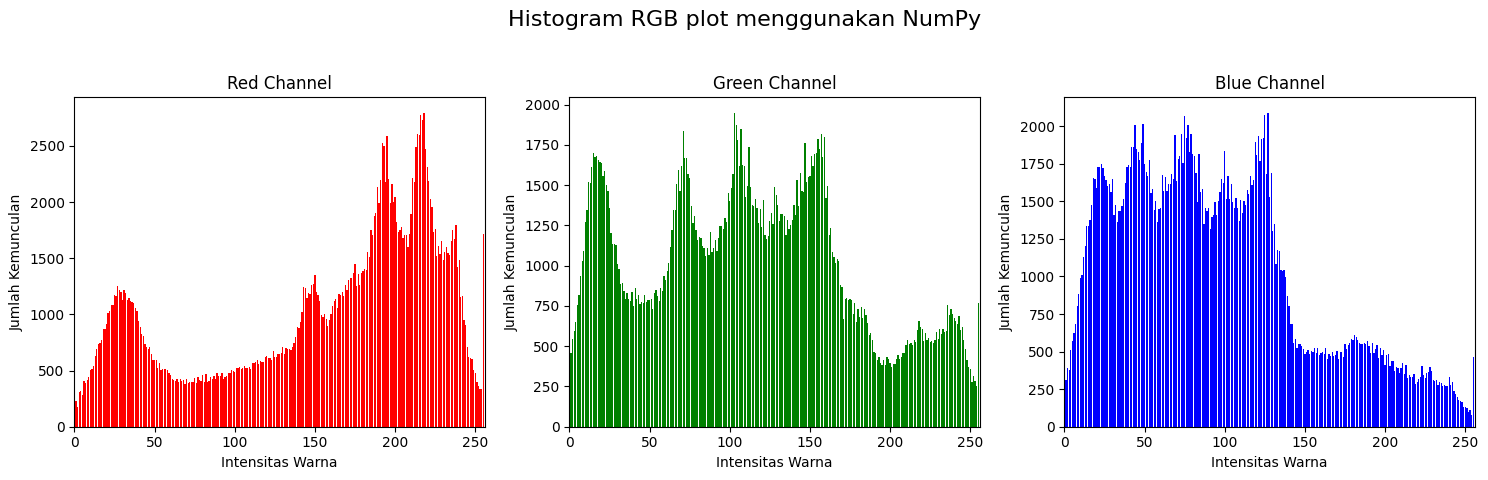

In [6]:
# Load and convert the image from BGR to RGB
image_rgb = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/lena.jpg'), cv2.COLOR_BGR2RGB)

# Colors and titles for the channels
colors = ('r', 'g', 'b')
channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel']

# Create a figure with three subplots
plt.figure(figsize=(15, 5))

# Loop through each color channel (R, G, B)
for i, color in enumerate(colors):
    # Use NumPy's histogram for each channel
    plt.subplot(1, 3, i + 1)
    plt.bar(np.arange(256), np.histogram(image_rgb[:, :, i], bins=256, range=(0, 256))[0], color=color)
    plt.xlim([0, 256])
    plt.title(channel_titles[i])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

# Set the overall title for the plot
plt.suptitle('Histogram RGB plot menggunakan NumPy', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

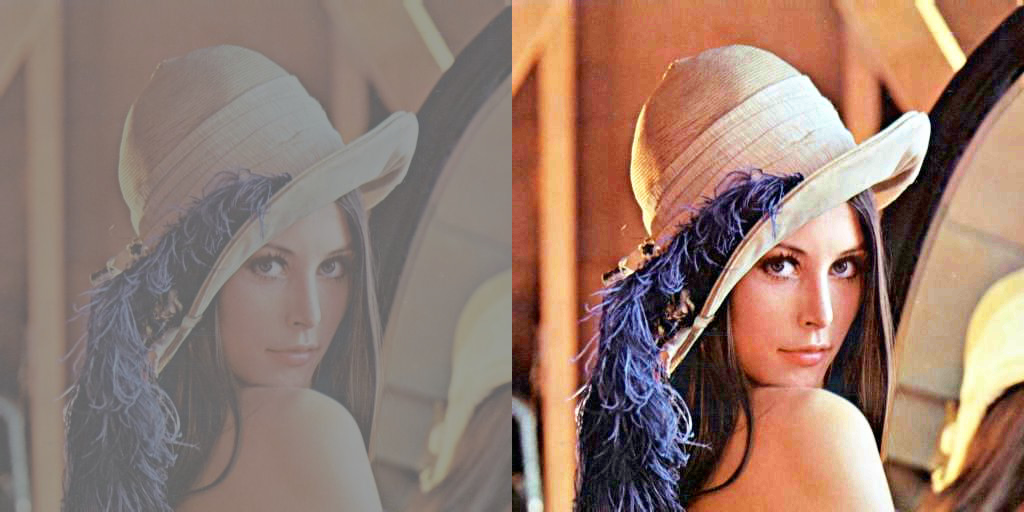

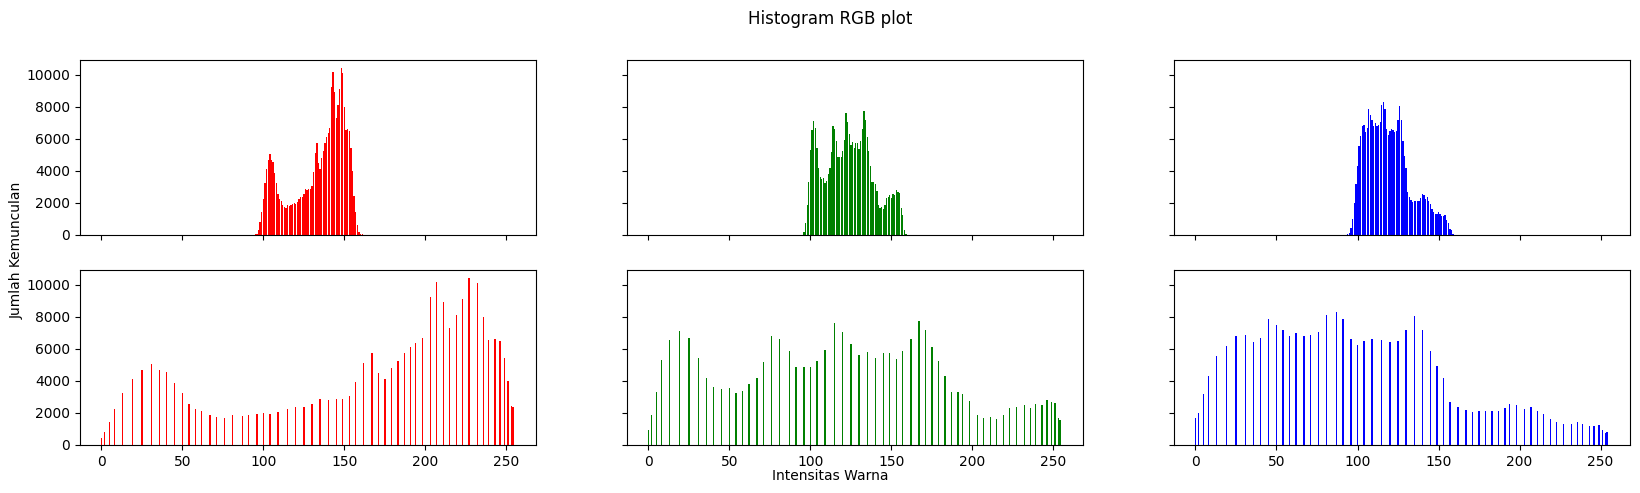

In [ ]:
# Read the image
img1 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg')

def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1  # Blue channel
            ax[1][img[y][x][1]] += 1  # Green channel
            ax[2][img[y][x][2]] += 1  # Red channel
    return ax

histo_asli = histog(img1)

# Convert to Numpy array
img_array = np.asarray(img1)

# Step 1: Normalized cumulative histogram
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

# Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Step 3: Transformation
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]

# Reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# Compute equalized histogram
equal_histo = histog(img2)

# Concatenate images for comparison
final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

# Extract individual color channels for histogram plotting
blue = histo_asli[0]  # Blue channel histogram
green = histo_asli[1]  # Green channel histogram
red = histo_asli[2]  # Red channel histogram

# Check if the image is grayscale
isgrayimg = np.array_equal(blue, green) and np.array_equal(green, red)

# Plot histograms
names = np.arange(256)
if not isgrayimg:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0].bar(names, equal_histo[2], color='gray')
    axs[1].bar(names, equal_histo[2], color='gray')

plt.show()


6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

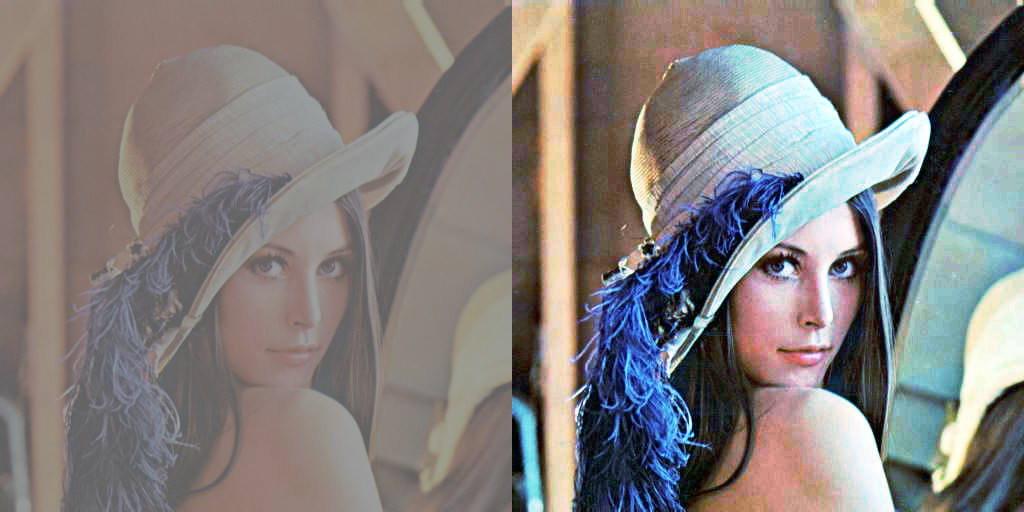

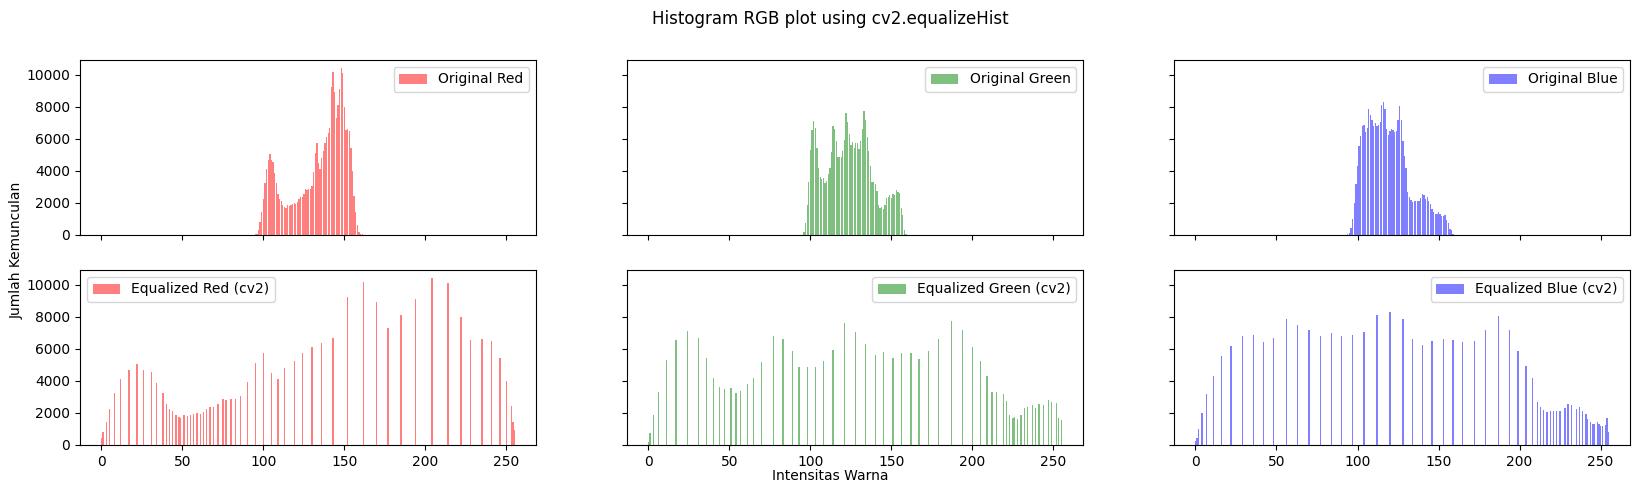

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img1 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg')

# Split the channels
b, g, r = cv.split(img1)

# Equalize each channel separately
eq_b = cv.equalizeHist(b)
eq_g = cv.equalizeHist(g)
eq_r = cv.equalizeHist(r)

# Merge the equalized channels
img_equalized_cv2 = cv.merge((eq_b, eq_g, eq_r))

# Compute histograms for comparison
histo_cv2 = histog(img_equalized_cv2)

# Concatenate images for comparison
final_frame_cv2 = cv.hconcat((img1, img_equalized_cv2))

# Show the images
cv2_imshow(final_frame_cv2)

# Plot histograms
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot using cv2.equalizeHist')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0, 0].bar(names, histo_asli[2], color='red', alpha=0.5, label='Original Red')
axs[0, 1].bar(names, histo_asli[1], color='green', alpha=0.5, label='Original Green')
axs[0, 2].bar(names, histo_asli[0], color='blue', alpha=0.5, label='Original Blue')

axs[1, 0].bar(names, histo_cv2[2], color='red', alpha=0.5, label='Equalized Red (cv2)')
axs[1, 1].bar(names, histo_cv2[1], color='green', alpha=0.5, label='Equalized Green (cv2)')
axs[1, 2].bar(names, histo_cv2[0], color='blue', alpha=0.5, label='Equalized Blue (cv2)')

# Show legends
for ax in axs.flat:
    ax.legend()
plt.show()


7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

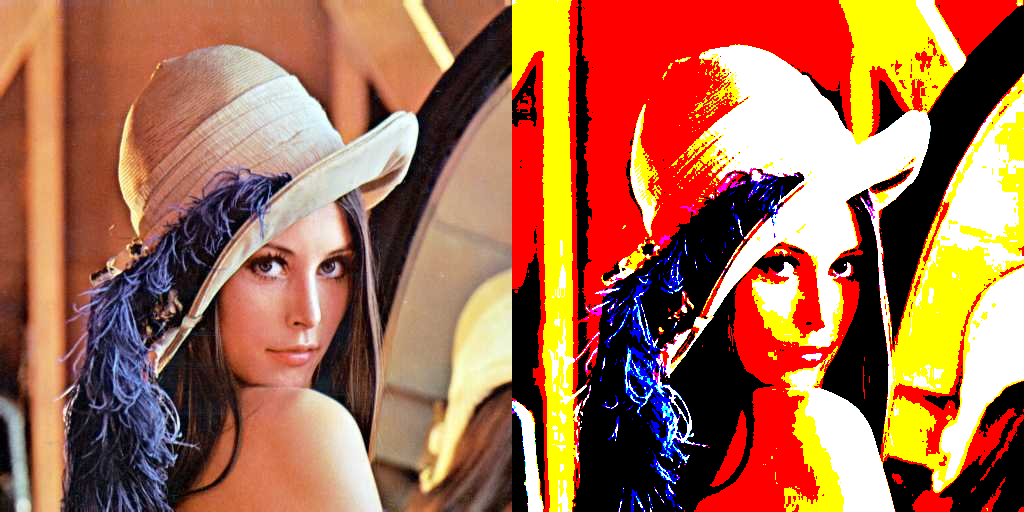

In [ ]:
# Load the image
image_path = ('/content/drive/MyDrive/PCVK_MM/Images/lena.jpg')
img = Image.open(image_path)

# Define the 8 target colors (RGB)
colors = {
    'black': [0, 0, 0],
    'green': [0, 255, 0],
    'yellow': [255, 255, 0],
    'blue': [0, 0, 255],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255],
    'white': [255, 255, 255],
    'red': [255, 0, 0]  # Tambahkan merah jika diperlukan
}

# Function to map a pixel to the nearest color
def closest_color(pixel, colors):
    colors_array = np.array(list(colors.values()))
    distances = np.sqrt(np.sum((colors_array - pixel) ** 2, axis=1))
    return colors_array[np.argmin(distances)]

# Remove the alpha channel if present (convert image to RGB)
if img.mode == 'RGBA':
    img = img.convert('RGB')

# Convert image to numpy array
img_array = np.array(img)

# Create an output array and map each pixel to its closest color
output_array = np.zeros_like(img_array)

# Apply the color quantization
for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
        output_array[i, j] = closest_color(img_array[i, j], colors)

# Convert the output array back to an image
output_img = Image.fromarray(output_array.astype('uint8'))

# Convert PIL images to OpenCV format (BGR)
img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
output_img_cv2 = cv2.cvtColor(np.array(output_img), cv2.COLOR_RGB2BGR)

# Concatenate images side by side using cv2.hconcat
final_frame_cv2 = cv2.hconcat([img_cv2, output_img_cv2])

# Show the concatenated images
cv2_imshow(final_frame_cv2)


8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

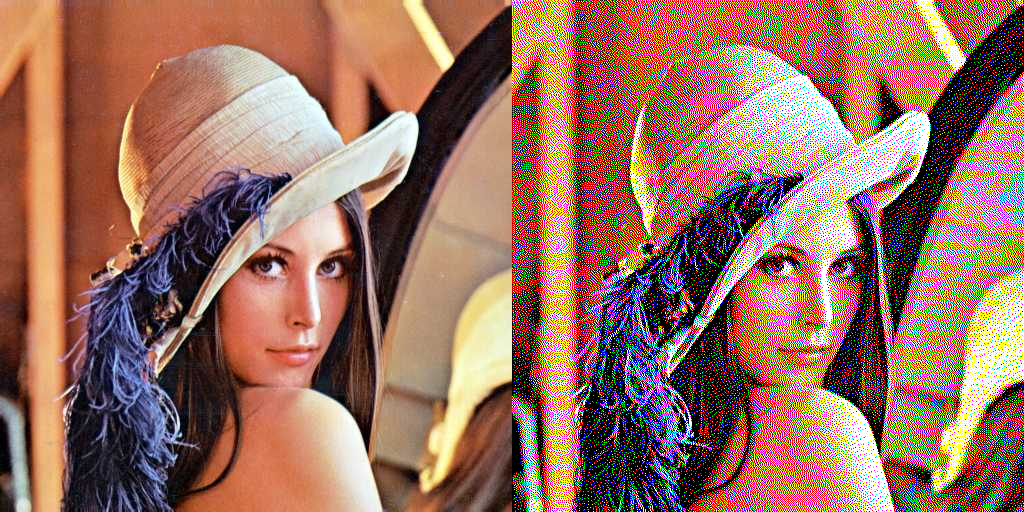

In [ ]:
# Load the image (keep it in RGB)
image_path = '/content/drive/MyDrive/PCVK_MM/Images/lena.jpg'
img = Image.open(image_path).convert('RGB')  # Keep the image in RGB mode

# Floyd-Steinberg dithering function
def floyd_steinberg_dithering(img_array):
    output_array = img_array.copy().astype(float)  # Working with float for error diffusion
    h, w = output_array.shape

    for y in range(h):
        for x in range(w):
            old_pixel = output_array[y, x]
            new_pixel = 255 if old_pixel > 127 else 0  # Thresholding
            output_array[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Diffuse quantization error
            if x + 1 < w: output_array[y, x + 1] += quant_error * 7 / 16
            if y + 1 < h:
                if x > 0: output_array[y + 1, x - 1] += quant_error * 3 / 16
                output_array[y + 1, x] += quant_error * 5 / 16
                if x + 1 < w: output_array[y + 1, x + 1] += quant_error * 1 / 16

    return output_array

# Convert the image to a numpy array and split into R, G, B channels
img_array = np.array(img)
dithered_channels = [floyd_steinberg_dithering(img_array[:, :, i]) for i in range(3)]

# Stack the dithered channels back together and convert to uint8
dithered_img_array = np.stack(dithered_channels, axis=2).astype('uint8')
dithered_image = Image.fromarray(dithered_img_array)

# Convert to OpenCV format for concatenation
img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
dithered_img_cv2 = cv2.cvtColor(np.array(dithered_image), cv2.COLOR_RGB2BGR)

# Concatenate original and dithered images side by side
final_frame_cv2 = cv2.hconcat([img_cv2, dithered_img_cv2])

# Show the images
cv2_imshow(final_frame_cv2)


9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

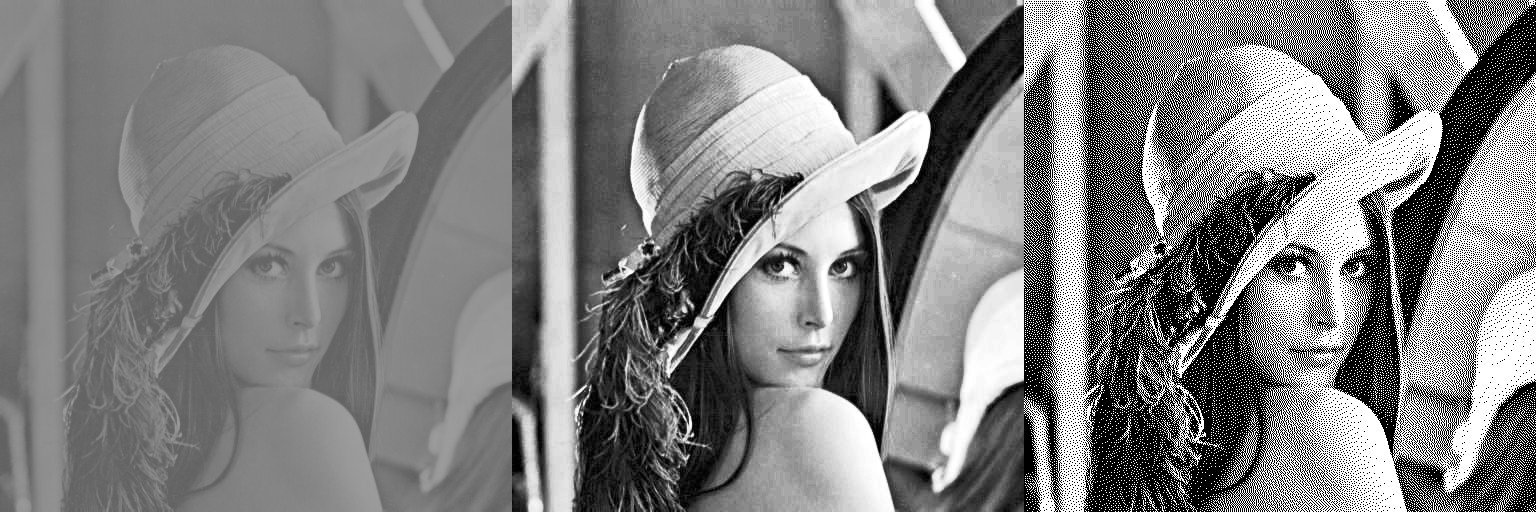

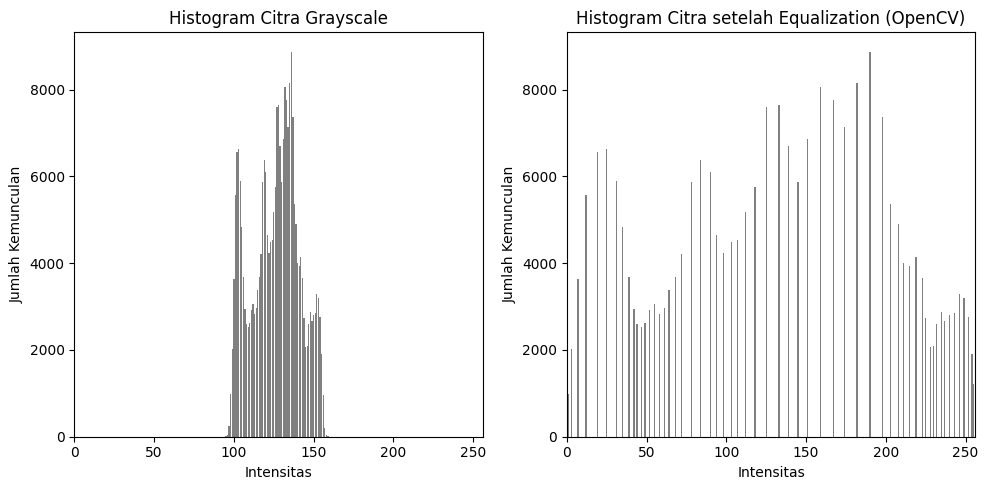

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow  # Untuk visualisasi di Colab

# Membaca gambar
img1 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg')

# Langkah 1: Konversi citra ke grayscale
gray_img = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

# Langkah 2: Histogram equalization menggunakan OpenCV
equalized_img_cv = cv.equalizeHist(gray_img)

# Langkah 3: Proses dithering Floyd-Steinberg
def floyd_steinberg_dithering(image):
    # Mengonversi gambar ke float untuk manipulasi yang lebih akurat
    img = image.astype(float) / 255.0
    h, w = img.shape

    # Floyd-Steinberg dithering algorithm
    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = np.round(old_pixel)
            img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < w:
                img[y, x + 1] += quant_error * 7 / 16
            if y + 1 < h:
                if x > 0:
                    img[y + 1, x - 1] += quant_error * 3 / 16
                img[y + 1, x] += quant_error * 5 / 16
                if x + 1 < w:
                    img[y + 1, x + 1] += quant_error * 1 / 16

    return (img * 255).astype(np.uint8)

# Menerapkan dithering pada citra equalized
dithered_img = floyd_steinberg_dithering(equalized_img_cv)

# Visualisasi hasil (grayscale, equalized, dithered)
final_frame_cv = cv.hconcat((gray_img, equalized_img_cv, dithered_img))
cv2_imshow(final_frame_cv)

# Plot histogram citra grayscale dan equalized
plt.figure(figsize=(10, 5))

# Histogram untuk citra grayscale
plt.subplot(1, 2, 1)
plt.title('Histogram Citra Grayscale')
plt.bar(np.arange(256), cv.calcHist([gray_img], [0], None, [256], [0, 256]).flatten(), color='gray')
plt.xlim([0, 256])
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')

# Histogram untuk citra yang sudah di-equalisasi
plt.subplot(1, 2, 2)
plt.title('Histogram Citra setelah Equalization (OpenCV)')
plt.bar(np.arange(256), cv.calcHist([equalized_img_cv], [0], None, [256], [0, 256]).flatten(), color='gray')
plt.xlim([0, 256])
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()
